# Download soil moisture from dv/v

This notebook will test foundational models that would predict hydrological parameters (e.g., soil moisture) given the past observations of dv/v and temp. This work is from Feng, Denolle, et al.

In [1]:
# we import data from a gdrive that has CSV files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# make list of files in DVV_data folder
dir0 = '../data/DVV_data_withMean'
files = os.listdir(dir0)
print(files)

['Data_SZCU.csv', 'Data_LCMT.csv', 'Data_CVRU.csv', 'Data_NOQ.csv', 'Data_RDMU.csv', 'Data_DUG.csv', 'Data_MPU.csv', 'Data_BGU.csv', 'Data_TCRU.csv', 'Data_CTU.csv', 'Data_SWUT.csv', 'Data_SPU.csv', 'Data_BRPU.csv', 'Data_TCU.csv', 'Data_SRU.csv', 'Data_BSUT.csv', 'Data_PNSU.csv', 'Data_NLU.csv', 'Data_PSUT.csv', 'Data_FOR1.csv', 'Data_HMU.csv', 'Data_FORU.csv', 'Data_MTPU.csv', 'Data_HWUT.csv', 'Data_LIUT.csv', 'Data_JLU.csv']


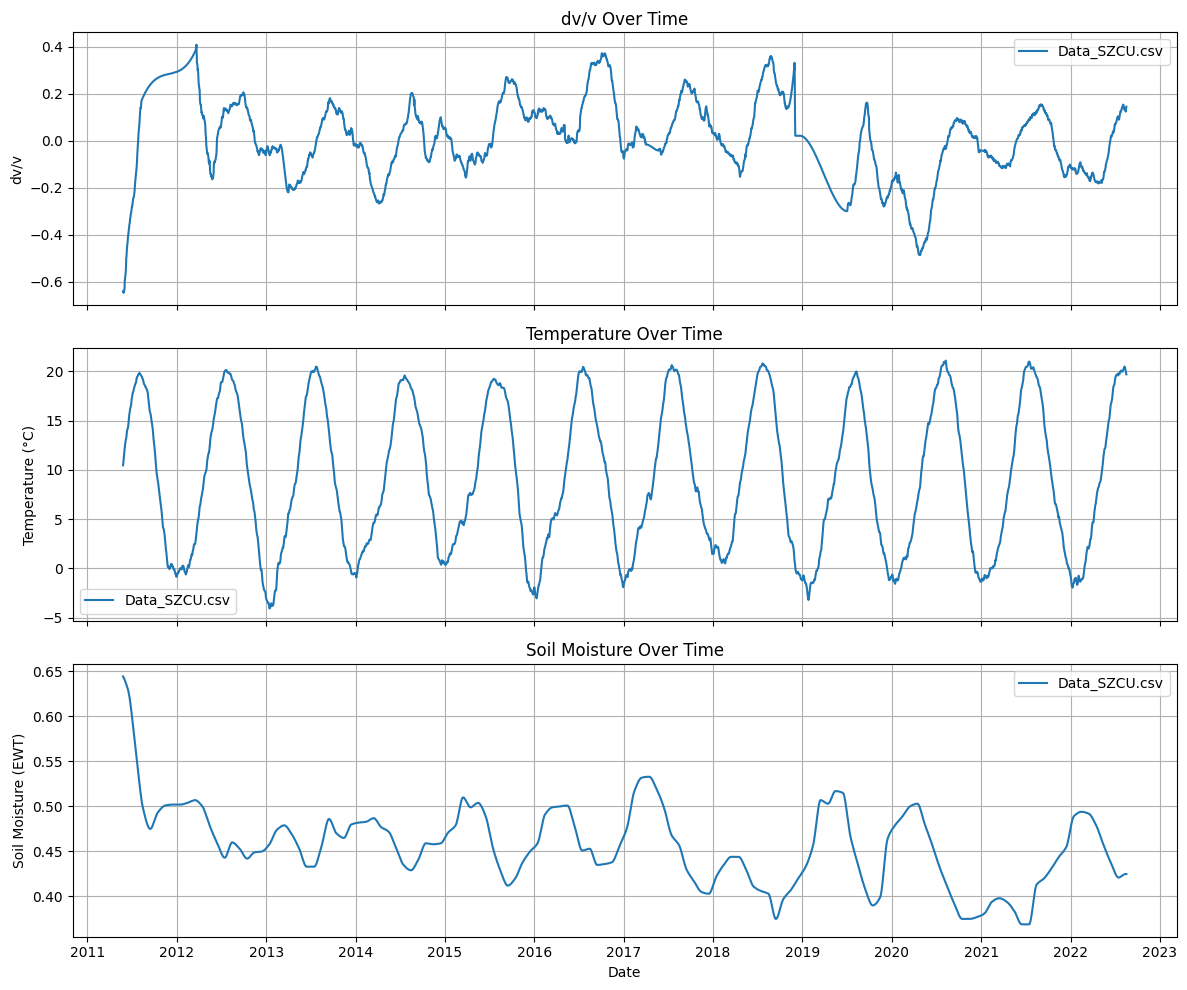

0      2011-05-27
1      2011-05-28
2      2011-05-29
3      2011-05-30
4      2011-05-31
          ...    
4096   2022-08-13
4097   2022-08-14
4098   2022-08-15
4099   2022-08-16
4100   2022-08-17
Name: date, Length: 4101, dtype: datetime64[ns]


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates


# Create a figure and a set of subplots

fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Read and plot the dv/v, temp, and sm_ewt columns against the date column
for file in files:
    df = pd.read_csv(f'{dir0}/{file}')

# convert date column to datetime
    df['date'] = pd.to_datetime(df['date'])

    # Plot dv/v
    axs[0].plot(df['date'], df['dv'], '-', label=file)
    axs[0].set_ylabel('dv/v')
    axs[0].set_title('dv/v Over Time')
    
    # Plot temp
    axs[1].plot(df['date'], df['temp'], '-', label=file)
    axs[1].set_ylabel('Temperature (°C)')
    axs[1].set_title('Temperature Over Time')
    
    # Plot sm_ewt
    axs[2].plot(df['date'], df['sm_ewt'], '-', label=file)
    axs[2].set_ylabel('Soil Moisture (EWT)')
    axs[2].set_title('Soil Moisture Over Time')

    # Set x-axis label for the last subplot
    axs[2].set_xlabel('Date')

        # Format the x-axis to show only years
    for ax in axs:
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.grid(True)
        ax.legend()

    # Add grids and legends to all subplots
    for ax in axs:
        ax.grid(True)
        ax.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()
    print(df['date'])
    break